In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Ads_CTR_Optimisation.csv');
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [7]:
#step 1
n=1000;  # total no of rounds=10000
ads=int(10);
Ni=np.zeros(ads,dtype=int);
Ri=np.zeros(ads,dtype=int);
ads_selected=[];
total_rewards=0;

#step 2
import math
for round in range(n):
    #user selecting the ad
    
    ad=0;
    maxUCB=0;
    for i in range(ads):
        if(Ni[i]>0):
            avgReward=(Ri[i]/Ni[i]);
            error=math.sqrt((3/2)*(math.log(round+1)/Ni[i]));
            LCB=avgReward-error
            UCB=avgReward+error
        else:
            UCB=1e400
            
        #step 3 
        if(UCB>maxUCB):
            maxUCB=UCB;
            ad=i;
            
    #step4 
    ads_selected.append(ad);
    Ni[ad]+=1
    
    feedback=data.values[round,ad]
    Ri[ad]+=feedback
    total_rewards+=feedback  
    print(f"Total rewards after round {round + 1}: {total_rewards}")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,0,0,0,0


## Realtime user feedback

In [22]:
#step 1
n=100;  # total no of rounds=10000
ads=int(10);
Ni=np.zeros(ads,dtype=int);
Ri=np.zeros(ads,dtype=int);
ads_selected=[];
total_rewards=0;

user_feedback=np.zeros(ads,dtype=int); #for each round
#step 2
import math
for round in range(n):
    #user selecting the ad
    
    ad=0;
    maxUCB=0;
    for i in range(ads):
        if(Ni[i]>0):
            avgReward=(Ri[i]/Ni[i]);
            error=math.sqrt((3/2)*(math.log(round+1)/Ni[i]));
            LCB=avgReward-error
            UCB=avgReward+error
        else:
            UCB=1e400
            
        #step 3 
        if(UCB>maxUCB):
            maxUCB=UCB;
            ad=i;
            
    #step4 
    ads_selected.append(ad);
    Ni[ad]+=1
    # taking user input
    #feedback=data.values[round,ad]
    feedback=int(input(f"Round :{round+1} : What is you feedback for ad {ad+1} (0/1)"))
    Ri[ad]+=feedback
    total_rewards+=feedback  
    print(f"Total rewards after round {round + 1}: {total_rewards}")

Total rewards after round 1: 1
Total rewards after round 2: 2
Total rewards after round 3: 2
Total rewards after round 4: 3
Total rewards after round 5: 4
Total rewards after round 6: 5
Total rewards after round 7: 5
Total rewards after round 8: 5
Total rewards after round 9: 6
Total rewards after round 10: 7
Total rewards after round 11: 8
Total rewards after round 12: 9
Total rewards after round 13: 9
Total rewards after round 14: 9
Total rewards after round 15: 9
Total rewards after round 16: 9
Total rewards after round 17: 9
Total rewards after round 18: 9
Total rewards after round 19: 9
Total rewards after round 20: 9
Total rewards after round 21: 9
Total rewards after round 22: 9
Total rewards after round 23: 9
Total rewards after round 24: 10
Total rewards after round 25: 11
Total rewards after round 26: 12
Total rewards after round 27: 13
Total rewards after round 28: 14
Total rewards after round 29: 15
Total rewards after round 30: 15
Total rewards after round 31: 16
Total rew

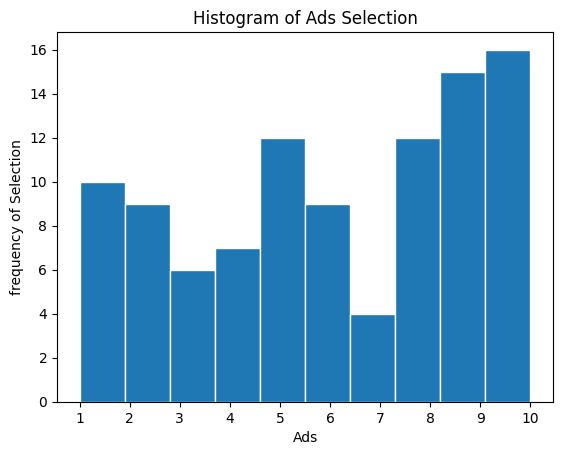

In [23]:
plt.title('Histogram of Ads Selection');
plt.xlabel('Ads');
plt.ylabel('frequency of Selection');
plt.xticks(np.arange(0,10));
plt.hist(ads_selected,bins=10,edgecolor='white');
plt.gca().set_xticklabels(np.arange(1, 11)) 
plt.show();

#instead of 10,000 runs , UCB can find the ad with highest returns in about 700 runs

In [25]:
# Find the ad with the highest frequency
ad_counts = np.bincount(ads_selected)
max_ad_count = np.max(ad_counts)
max_ad_index = np.argmax(ad_counts)

print(f"The ad with the highest clicking rate is ad {max_ad_index+1} with {max_ad_count} selections.")

The ad with the highest clicking rate is ad 10 with 16 selections.
